# Multiclass hard margin SVM solver

In [ ]:
!pip install git+https://github.com/YutongWangUMich/msvmpy.git

  Cloning https://github.com/YutongWangUMich/msvmpy.git to /tmp/pip-req-build-005vlnlt
  Running command git clone --filter=blob:none --quiet https://github.com/YutongWangUMich/msvmpy.git /tmp/pip-req-build-005vlnlt
  Resolved https://github.com/YutongWangUMich/msvmpy.git to commit ab11ca44fef75bbf770c1b9090a60b324e7077fc
  Preparing metadata (setup.py) ... done
  Created wheel for msvmpy: filename=msvmpy-0.1.0-py3-none-any.whl size=4548 sha256=94c121186cc6529a354a57dbdebd0fe0c4fa07110c88448bf35918877762e4b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-b3kkcp4f/wheels/f9/70/c5/ab896981748dfdf9ad9f4ee889f9100c50133cc9bc0275de3e
Successfully built msvmpy


# Plotting

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def get_intersection_points_with_corners(u0, u1, xlims, ylims):
  # Create the meshgrid
  xx, yy = np.meshgrid(xlims, ylims)

  # Stack the coordinates and reshape
  corners = np.vstack([xx.ravel(), yy.ravel()]).T
  c0 = np.dot(corners, u0)
  c1 = np.dot(corners, u1)


  return np.array([corners[i,:] for i in range(corners.shape[0]) if c0[i] >= 0 and c1[i]>=0 ])


def get_intersection_points_with_lims(u, xlims, ylims):
  # intersection of u with the limit boxes
  x0 = -ylims[0]*u[1]/u[0]
  x1 = -ylims[1]*u[1]/u[0]

  return None


def get_intersection_points_with_lims(u, xlims, ylims):
  # intersection of u with the limit boxes
  x0 = -ylims[0]*u[1]/u[0]
  x1 = -ylims[1]*u[1]/u[0]
  y0 = -xlims[0]*u[0]/u[1]
  y1 = -xlims[1]*u[0]/u[1]
  zx = [[x0, ylims[0]], [x1, ylims[1]]]
  zy = [[xlims[0],y0], [xlims[1], y1]]

  zx = [p for p in zx if p[0] <= xlims[1] and p[0] >= xlims[0]]
  zy = [p for p in zy if p[1] <= ylims[1] and p[1] >= ylims[0]]
  return np.array(zx+zy)

def get_intersection_points_positive_cone_bd(u0,u1,xlims,ylims):
  # intersection of the positive cone boundary of u0 u1 with the limit boxes
  z0 = get_intersection_points_with_lims(u0,xlims,ylims)
  z1 = get_intersection_points_with_lims(u1,xlims,ylims)
  z0_interior = np.dot(z0,u1)>0

  z1_interior = np.dot(z1,u0)>0
  return np.vstack([z0[z0_interior,:],z1[z1_interior,:]])


def sort_by_angles(X):
  # Step 1: Center the rows
  row_means = X.mean(axis=0).reshape(1,-1)
  X_centered = X - row_means

  # Step 2: Calculate the angles thetas of X_centered with respect to the origin
  thetas = np.arctan2(X_centered[:, 1], X_centered[:, 0])+(np.pi/2.0)

  # Step 3: Sort the rows of X based on thetas
  sorted_indices = np.argsort(thetas)
  X_sorted = X[sorted_indices,:]
  return X_sorted


def plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,facecolor,alpha, fill=True):
    z0 = get_intersection_points_with_lims(u0,xlims,ylims)
    z1 = get_intersection_points_with_lims(u1,xlims,ylims)

    z0_interior = np.dot(z0,u1)>0
    z1_interior = np.dot(z1,u0)>0

    vertices_axes = get_intersection_points_positive_cone_bd(u0,u1, xlims,ylims)
    vertices_corners = get_intersection_points_with_corners(u0,u1, xlims,ylims)
    if vertices_corners.shape[0] > 0:
        vertices = np.vstack([np.zeros(shape=(1,2)),vertices_axes,vertices_corners])
    else:
        vertices = np.vstack([np.zeros(shape=(1,2)),vertices_axes])
    vertices_ordered = sort_by_angles(vertices)

    # Create the polygon using the vertices
    polygon = patches.Polygon(vertices_ordered, closed=False, fill=fill, edgecolor=edgecolor, facecolor=facecolor,alpha=alpha)

    # Add the polygon to the plot
    plt.gca().add_patch(polygon)
    return None



def plot_dec_regi(W, edgecolor = 'k', color_palette = ['#D81B60','#1E88E5','#FFC107'],alpha=0.1):

    xlims = plt.gca().get_xlim()
    ylims = plt.gca().get_ylim()

    u0 = W[:,0] - W[:,1]
    u1 = W[:,0] - W[:,2]
    plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,color_palette[0],alpha)

    u0 = W[:,1] - W[:,0]
    u1 = W[:,1] - W[:,2]
    plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,color_palette[1],alpha)

    u0 = W[:,2] - W[:,0]
    u1 = W[:,2] - W[:,1]
    plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,color_palette[2],alpha)

    return None



def dec_bdry_lin_3c_2d(W, edgecolor = 'k', color_palette = ['#D81B60','#1E88E5','#FFC107'],alpha=0.1):

    ax = plt.gca()
    xlims = plt.gca().get_xlim()
    ylims = plt.gca().get_ylim()

    u0 = W[:,0] - W[:,1]
    u1 = W[:,0] - W[:,2]
    plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,None,1.0, fill=False)

    u0 = W[:,1] - W[:,0]
    u1 = W[:,1] - W[:,2]
    plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,None,1.0, fill=False)

    u0 = W[:,2] - W[:,0]
    u1 = W[:,2] - W[:,1]
    plot_dec_polygon(u0,u1,xlims,ylims, edgecolor,None,1.0, fill=False)


    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    return None

# Plot a small example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import msvmpy.hard_margin as hard_margin
from sklearn.datasets import make_blobs

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad, jit
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt


# Function to compute the Frobenius norm
def frobenius_norm(M):
    return jnp.sqrt(jnp.sum(M ** 2))


def make_dataset(num_samples, num_classes, num_features, Wstar = None, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    X = np.random.randn(num_samples, num_features)
    if Wstar is None:
        Wstar = np.random.randn(num_features, num_classes)  # ground truth classifier
    y = np.argmax(X @ Wstar, axis=1)  # labels
    return X, y, Wstar, len(np.unique(y)) == num_classes # the last parameter is a boolean false for if all classes appear



In [ ]:

def run_single_experiment(params):
    # Unpack parameters
    num_samples = params['num_samples']
    num_classes = params['num_classes']
    num_features = params['num_features']
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs']
    random_seed_for_make_data = params['random_seed_for_make_data']
    random_seed_for_W_init = params['random_seed_for_W_init']
    record_every_n_epochs = params['record_every_n_epochs']

    # Check for valid random seed
    assert random_seed_for_make_data < 10000, "random_seed_for_make_data must be less than 10000"

    # Create combined training and test dataset
    X_train_test, y_train_test, Wstar, all_classes_appear = make_dataset(2 * num_samples, num_classes, num_features, random_seed=random_seed_for_make_data)
    if not all_classes_appear:
        return None
    # Split the combined dataset into training and test sets
    X = X_train_test[:num_samples]
    X_test = X_train_test[num_samples:]
    y = y_train_test[:num_samples]
    y_test = y_train_test[num_samples:]


    Wsvm, _ = hard_margin.FnormA_du_rmarg(X,y,num_classes)

    # One-hot encode the target variable
    encoder = OneHotEncoder(sparse=False)
    y_one_hot = encoder.fit_transform(y.reshape(-1, 1))  # shape (n, 3)
    y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))  # shape (n, 3)

    # Initialize weights
    key = jax.random.PRNGKey(random_seed_for_W_init)
    W = jax.random.normal(key, (num_features, num_classes))

    # Modify W such that the columns of W add up to zero
    W -= jnp.mean(W, axis=1, keepdims=True)

    # Initialize Wsvm for the Frobenius norm calculation
    # Wsvm = jax.random.normal(key, (num_features, num_classes))
    Wsvm_normalized = Wsvm / frobenius_norm(Wsvm)


    # Define the model
    def model(X, W):
        return jnp.dot(X, W)

    # # Define the loss function (pairlog loss)
    # # NOTE: THIS IS NUMERICALLY UNSTABLE
    # def pairlog_loss(W,X,y_one_hot):
    #     preds = model(X,W)
    #     preds_true_class = jnp.sum(preds*y_one_hot,axis=1)
    #     margins = preds_true_class[:, None] - preds
    #     return jnp.mean(jnp.log(1+jnp.exp(-margins)))


    # Define the loss function (pairlog loss)
    def pairlog_loss(W,X,y_one_hot):
        preds = model(X,W)
        preds_true_class = jnp.sum(preds*y_one_hot,axis=1)
        margins = preds_true_class[:, None] - preds
        margins_stacked = margins.T.reshape(-1, 1)
        zeros_column = jnp.zeros((margins_stacked.shape[0], 1))
        margins_stacked_plus_zero = jnp.hstack((margins_stacked, zeros_column))
        return jnp.mean(jax.scipy.special.logsumexp(-margins_stacked_plus_zero,axis=1))

    # Compute the gradient of the loss function with respect to the weights
    grad_loss = grad(pairlog_loss)

    # Define the training step
    @jit
    def train_step(W, X, y_one_hot, learning_rate):
        grads = grad_loss(W, X, y_one_hot)
        return W - learning_rate * grads

    # Function to compute accuracy
    def compute_accuracy(W, X, y):
        preds = model(X, W)
        pred_classes = jnp.argmax(preds, axis=1)
        return jnp.mean(pred_classes == y)

    # Lists to store metrics for plotting
    loss_list = []
    accuracy_train_list = []
    accuracy_test_list = []
    frobenius_diff_list = []

    accuracy_train_Wsvm = compute_accuracy(Wsvm, X, y)
    accuracy_test_Wsvm = compute_accuracy(Wsvm, X_test, y_test)
    print('accuracy_train_Wsvm', accuracy_train_Wsvm)
    print('accuracy_test_Wsvm', accuracy_test_Wsvm)
    # Training loop
    for epoch in range(num_epochs):
        W = train_step(W, X, y_one_hot, learning_rate)
        W_normalized = W / frobenius_norm(W)
        difference = Wsvm_normalized - W_normalized
        frobenius_diff = frobenius_norm(difference)

        if (epoch-1) % record_every_n_epochs == 0:
            loss = pairlog_loss(W, X, y_one_hot)
            accuracy_train = compute_accuracy(W, X, y)
            accuracy_test = compute_accuracy(W, X_test, y_test)
            accuracy_train_list.append(accuracy_train)
            accuracy_test_list.append(accuracy_test)
            loss_list.append(loss)
            frobenius_diff_list.append(frobenius_diff)
            # print(f"Epoch {epoch}, Loss: {loss}, Train Accuracy: {accuracy_train}, Test Accuracy: {accuracy_test}, Frobenius Difference: {frobenius_diff}")

    print("Training complete.")

    return {
        'X':X,
        'y':y,
        'X_test':X_test,
        'y_test':y_test,
        'Wstar':Wstar,
        'Wsvm':Wsvm,
        'Wfinal':W,
        'loss_list': loss_list,
        'accuracy_train_Wsvm':accuracy_train_Wsvm,
        'accuracy_test_Wsvm':accuracy_test_Wsvm,
        'accuracy_train_list': accuracy_train_list,
        'accuracy_test_list': accuracy_test_list,
        'frobenius_diff_list': frobenius_diff_list
    }


params = {
    'num_samples': 10,
    'num_classes': 3,
    'num_features': 2,
    'learning_rate': .1,
    'num_epochs': 100,
    'random_seed_for_make_data': 42,
    'random_seed_for_W_init': 0,
    'record_every_n_epochs': 10
}

results = run_single_experiment(params)


X = results['X']
y = results['y']
Wsvm = results['Wsvm']
Wfinal = results['Wfinal']



accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.90000004
Training complete.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


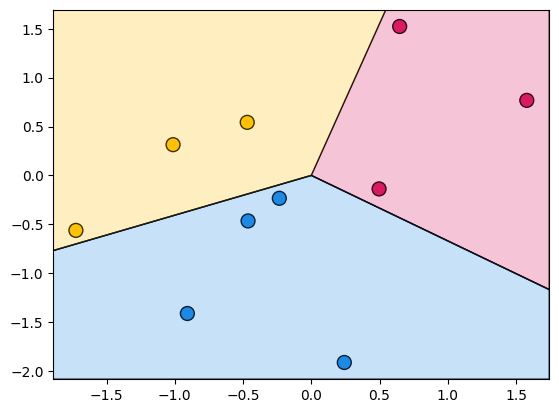

In [ ]:
color_palette = ['#D81B60','#1E88E5','#FFC107']
y_color = list(map(lambda x: color_palette[x], y))

num_features = params['num_features']
if num_features == 2:
  plt.scatter(X[:,0],X[:,1],c = y_color,s=100,edgecolor='k')
  dec_bdry_lin_3c_2d(Wsvm)
  plot_dec_regi(Wsvm,alpha=0.25)
plt.savefig('Wsvm.pdf')

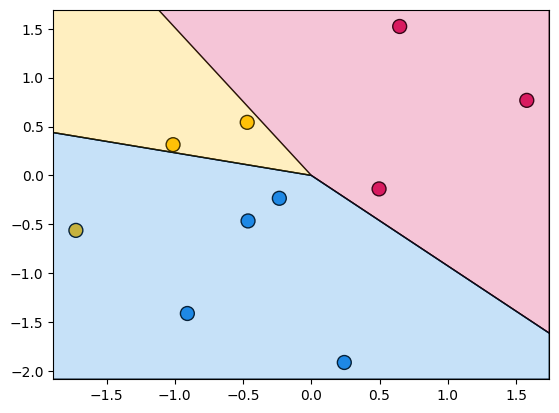

In [ ]:


num_features = params['num_features']
if num_features == 2:
  plt.scatter(X[:,0],X[:,1],c = y_color,s=100,edgecolor='k')
  dec_bdry_lin_3c_2d(Wfinal)
  plot_dec_regi(Wfinal,alpha=0.25)
plt.savefig('Wfinal100.pdf')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.90000004
Training complete.


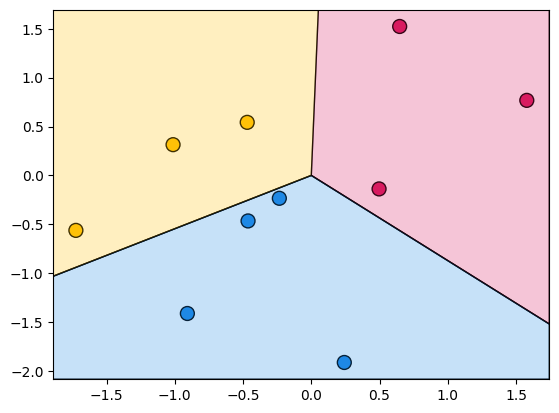

In [ ]:

params = {
    'num_samples': 10,
    'num_classes': 3,
    'num_features': 2,
    'learning_rate': .1,
    'num_epochs': 1000,
    'random_seed_for_make_data': 42,
    'random_seed_for_W_init': 0,
    'record_every_n_epochs': 10
}

results = run_single_experiment(params)


X = results['X']
y = results['y']
Wsvm = results['Wsvm']
Wfinal = results['Wfinal']


num_features = params['num_features']
if num_features == 2:
  plt.scatter(X[:,0],X[:,1],c = y_color,s=100,edgecolor='k')
  dec_bdry_lin_3c_2d(Wfinal)
  plot_dec_regi(Wfinal,alpha=0.25)
plt.savefig('Wfinal1000.pdf')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.90000004
Training complete.


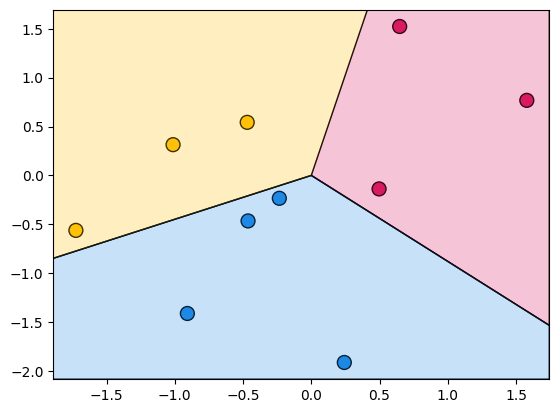

In [ ]:

params = {
    'num_samples': 10,
    'num_classes': 3,
    'num_features': 2,
    'learning_rate': .1,
    'num_epochs': 100000,
    'random_seed_for_make_data': 42,
    'random_seed_for_W_init': 0,
    'record_every_n_epochs': 10
}

results = run_single_experiment(params)


X = results['X']
y = results['y']
Wsvm = results['Wsvm']
Wfinal = results['Wfinal']


num_features = params['num_features']
if num_features == 2:
  plt.scatter(X[:,0],X[:,1],c = y_color,s=100,edgecolor='k')
  dec_bdry_lin_3c_2d(Wfinal)
  plot_dec_regi(Wfinal,alpha=0.25)
plt.savefig('Wfinal100000.pdf')

# Large scale sweep

In [ ]:

# Example usage:
params = {
    'num_samples': 100,
    'num_classes': 3,
    'num_features': 10,
    'learning_rate': .1,
    'num_epochs': 100000,
    'random_seed_for_make_data': 42,
    'random_seed_for_W_init': 0,
    'record_every_n_epochs': 10
}
record_every_n_epochs = params['record_every_n_epochs']


In [ ]:

record_every_n_epochs = params['record_every_n_epochs']
epochs = np.arange(0, len(results['loss_list']) * record_every_n_epochs, record_every_n_epochs)+1



In [ ]:
results_list = []
seed = 0
i = 0
while i < 10:
# for seed in range(10):
    params['random_seed_for_W_init'] = seed
    params['random_seed_for_make_data'] = seed

    results = run_single_experiment(params)
    if results is None:
        seed += 1
        print("bad seed, not all classes appear")
    else:
        seed += 1
        i += 1
        results_list.append(results)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.93
Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.90999997


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.
accuracy_train_Wsvm 1.0
accuracy_test_Wsvm 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training complete.


In [ ]:
# import pickle
# with open('results_list.pkl', 'wb') as file:
#     pickle.dump(results_list, file)


In [ ]:
# from google.colab import files

# # Download the pickled figure file
# files.download('results_list.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

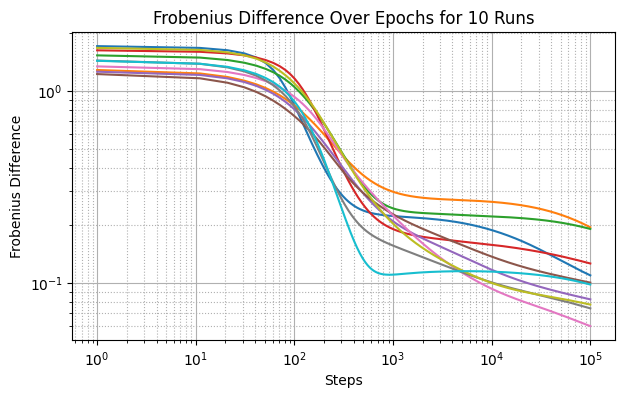

In [ ]:
from matplotlib.ticker import LogLocator, FormatStrFormatter

plt.figure(figsize=(7, 4))
for i, results in enumerate(results_list):
    # epochs = range(0, len(results['loss_list']) * 100, 100)
    plt.loglog(epochs, results['frobenius_diff_list'], label=f'Run {i + 1}')





plt.xlabel('Steps')
plt.ylabel('Frobenius Difference')
plt.title('Frobenius Difference Over Steps for 10 Runs')
# plt.legend()
plt.grid(True)

ax = plt.gca()
# Set major ticks on y-axis
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

# Set minor ticks on y-axis (at intervals of 0.1, 0.2, ..., 0.9)
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=10))

# Format the major ticks
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Show grid lines for minor ticks
ax.grid(which='minor', linestyle=':')
# ax.grid(which='major', linestyle='--')

plt.savefig('frobenius-norm-difference.pdf')

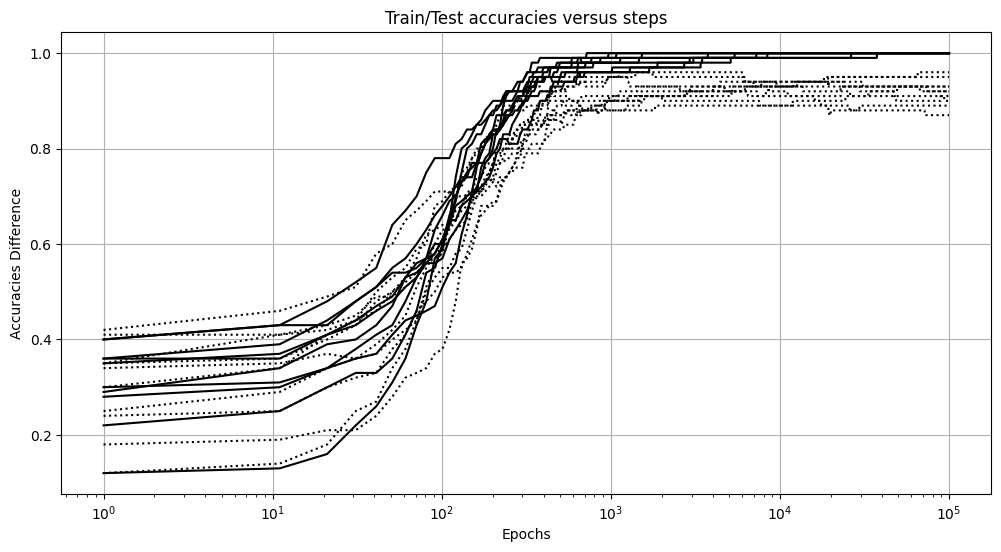

In [ ]:

plt.figure(figsize=(12, 6))
for i, results in enumerate(results_list):
    # epochs = range(0, len(results['loss_list']) * 100, 100)
    plt.semilogx(epochs, results['accuracy_train_list'], label=f'Run {i + 1}', color='k')
    plt.semilogx(epochs, results['accuracy_test_list'], label=f'Run {i + 1}', color='k', linestyle=':')
plt.xlabel('Epochs')
plt.ylabel('Accuracies Difference')
plt.title('Train/Test accuracies versus steps')
# plt.legend()
plt.grid(True)
plt.show()